In [1]:
import gc

# data
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# encoders
from tools.encoders import LabelEncoder
from tools.encoders import FrequencyEncoder
from tools.encoders import AggregateEncoder

# model
import xgboost as xgb

# evaluation
from sklearn.model_selection import GroupKFold
from sklearn.metrics import roc_auc_score

In [5]:
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
from sklearn.metrics import f1_score

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
train = pd.read_csv("D:\DATA KAGGLE\IEEE CIS FRAUD DETECTION\IEEE_clean1train.csv")
test = pd.read_csv("D:\DATA KAGGLE\IEEE CIS FRAUD DETECTION\IEEE_clean1test.csv")

In [17]:
train.head()

,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,dist1,dist2,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4n,D5,D9,D10n,D11n,D15n,V2,V3,V5,V6,V7,V8,V9,V11,V13,V16,V17,V20,V23,V30,V36,V38,V40,V41,V45,V47,V49,V52,V54,V55,V56,V60,V62,V67,V70,V74,V76,V78,V80,V83,V86,V91,V92,V95,V96,V99,V100,V127,V130,V131,V167,V169,V170,V172,V173,V175,V176,V177,V183,V185,V198,V199,V201,V202,V203,V204,V205,V206,V207,V210,V211,V213,V217,V220,V222,V231,V233,V234,V235,V239,V240,V251,V260,V263,V264,V265,V271,V273,V279,V282,V283,V285,V287,V289,V303,V306,V307,V310,V312,V314,id_01,id_02,id_05,id_06,id_09,id_10,id_11,id_13,id_17,id_19,id_20,TransactionCent,DeviceInfo_lbl,DeviceType_lbl,M1_lbl,M2_lbl,M3_lbl,M4_lbl,M5_lbl,M6_lbl,M7_lbl,M8_lbl,M9_lbl,P_emaildomain_lbl,ProductCD_lbl,R_emaildomain_lbl,card4_lbl,card6_lbl,id_12_lbl,id_15_lbl,id_16_lbl,id_28_lbl,id_29_lbl,id_31_lbl,id_35_lbl,id_36_lbl,id_37_lbl,id_38_lbl
0,0,86400,68.5,13926,-127,150,142,315,87,19,-127,1,1,0,0,0,1,0,0,1,0,2,0,1,1,14,-127,13,-127.000000,-127,-127.0,12.000000,12.0000,-1.000000,1,1,1,1,1,1,1,0,1,0,0,1,1,0,-127,-127,-127,-127,-127,-127,-127,-127,1,1,1,0,1,1,0,0,1,1,0,0,1,0,0,0,1,0,0,117.0,0.0,0.0,-127,-127,-127,-127,-127,-127,-127,-127,-127,-127,-127,-127,-127,-127.0,-127.0,-127.0,-127.0,-127.0,-127.0,-127.0,-127.0,-127.0,-127,-127,-127,-127,-127,-127,-127,-127,-127,-127,-127,-127.0,-127.0,-127.0,-127.0,-127.0,0,1,1,0,0,0,0,0.0,117.0,0.0,0.0,0.0,-127,-127,-127,-127,-127,-127,-127.0,-127,-127,-127,-127,0.5,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,0,86401,29.0,2755,404,150,102,325,87,-127,-127,1,1,0,0,0,1,0,0,0,0,1,0,1,1,0,-127,-127,-1.000012,-127,-127.0,-1.000012,-127.0000,-1.000012,-127,-127,-127,-127,-127,-127,-127,-127,0,0,0,1,1,0,0,1,0,1,1,1,0,0,0,1,1,0,1,1,0,0,0,1,0,1,1,0,0,0,0,0,0,0.0,0.0,0.0,-127,-127,-127,-127,-127,-127,-127,-127,-127,-127,-127,-127,-127,-127.0,-127.0,-127.0,-127.0,-127.0,-127.0,-127.0,-127.0,-127.0,-127,-127,-127,-127,-127,-127,-127,-127,-127,-127,-127,-127.0,-127.0,-127.0,-127.0,-127.0,0,1,1,0,0,0,0,0.0,0.0,0.0,0.0,0.0,-127,-127,-127,-127,-127,-127,-127.0,-127,-127,-127,-127,0.0,1,1,2,2,2,2,2,1,1,1,1,2,1,1,2,1,1,1,1,1,1,1,1,1,1,1
2,0,86469,59.0,4663,490,150,166,330,87,287,-127,1,1,0,0,0,1,0,0,1,0,1,0,1,1,0,-127,-127,-1.000799,-127,-127.0,-1.000799,313.9992,313.999200,1,1,1,1,1,1,1,0,1,0,0,1,1,0,1,1,0,1,1,1,0,0,1,1,1,0,1,1,0,0,1,1,0,1,1,0,0,0,0,0,0,0.0,0.0,0.0,-127,-127,-127,-127,-127,-127,-127,-127,-127,-127,-127,-127,-127,-127.0,-127.0,-127.0,-127.0,-127.0,-127.0,-127.0,-127.0,-127.0,-127,-127,-127,-127,-127,-127,-127,-127,-127,-127,-127,-127.0,-127.0,-127.0,-127.0,-127.0,0,1,1,0,0,0,0,0.0,0.0,0.0,0.0,0.0,-127,-127,-127,-127,-127,-127,-127.0,-127,-127,-127,-127,0.0,1,1,1,1,1,2,1,2,2,2,2,3,1,1,3,2,1,1,1,1,1,1,1,1,1,1
3,0,86499,50.0,18132,567,150,117,476,87,-127,-127,2,5,0,0,0,4,0,0,1,0,1,0,25,1,112,112,0,92.998856,0,-127.0,82.998856,-127.0000,109.998856,-127,-127,-127,-127,-127,-127,-127,-127,1,0,0,1,1,0,1,1,0,1,1,1,0,0,1,1,1,0,1,1,0,0,1,1,0,1,1,0,0,1,48,10,4,1758.0,354.0,135.0,-127,-127,-127,-127,-127,-127,-127,-127,-127,-127,-127,-127,-127,-127.0,-127.0,-127.0,-127.0,-127.0,-127.0,-127.0,-127.0,-127.0,-127,-127,-127,-127,-127,-127,-127,-127,-127,-127,-127,-127.0,-127.0,-127.0,-127.0,-127.0,1,0,0,10,4,0,0,50.0,1758.0,354.0,135.0,0.0,-127,-127,-127,-127,-127,-127,-127.0,-127,-127,-127,-127,0.0,1,1,2,2,2,2,2,2,1,1,1,4,1,1,2,2,1,1,1,1,1,1,1,1,1,1
4,0,86506,50.0,4497,514,150,102,420,87,-127,-127,1,1,0,0,0,1,0,1,0,1,1,0,1,1,0,-127,-127,-127.000000,-127,-127.0,-127.000000,-127.0000,-127.000000,-127,-127,-127,-127,-127,-127,-127,-127,-127,-127,-127,-127,-127,-127,-127,-127,-127,-127,-127,-127,-127,-127,-127,-127,-127,-127,-127,-127,-127,-127,-127,-127,-127,-127,-127,-127,-127,0,0,0,0,0.0,0.0,0.0,0,0,1,0,0,0,1,0,0,0,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0,0,0,1,1,1,0.0,0.0,0.0,0.0,0.0,0,1,1,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0,70787,-127,-127,-127,-127,100.0,-127,166,542,144,0.0,2,2,2,2,2,3,3,3,1,1,1,2,2,1,2,

In [7]:
# initialize model
clf = xgb.XGBClassifier(
    nthread=4,
    max_depth=12, 
    missing=-127, 
    subsample=0.8,
    n_estimators=5000,
    learning_rate=0.02, 
    colsample_bytree=0.4, 
    eval_metric="auc",
    tree_method="hist" 
)

In [8]:
# split features and labels
if "isFraud" in train.columns:
    y_train = train["isFraud"]
    train = train.drop(columns=["isFraud"])

# 75% training, 25% validation
idxT = train.index[:3*len(train)//4]
idxV = train.index[3*len(train)//4:]

# columns
cols = list(train.columns)
cols.remove("TransactionDT")


In [9]:
X_train,Y_train = train.loc[idxT, cols], y_train[idxT] 

In [10]:
train.loc[idxT, cols], y_train[idxT]  # 92.295%

KeyboardInterrupt: 

In [17]:
Xvalid,yvalid = train.loc[idxV,cols],y_train[idxV]

In [21]:
# EXPERIMENT WITH FITTING DIFFERENTLY RESAMPLED DATA

h = clf.fit(X_tl, y_tl,
    
    eval_set=[(train.loc[idxV, cols], y_train[idxV])],
    verbose=50,
    early_stopping_rounds=100,
)

[0]	validation_0-auc:0.79436
Will train until validation_0-auc hasn't improved in 100 rounds.
[50]	validation_0-auc:0.87347
[100]	validation_0-auc:0.88104
[150]	validation_0-auc:0.88494
[200]	validation_0-auc:0.89113
[250]	validation_0-auc:0.89618
[300]	validation_0-auc:0.90131
[350]	validation_0-auc:0.90573
[400]	validation_0-auc:0.90882
[450]	validation_0-auc:0.91020
[500]	validation_0-auc:0.91192
[550]	validation_0-auc:0.91259
[600]	validation_0-auc:0.91218
Stopping. Best iteration:
[534]	validation_0-auc:0.91282



In [12]:
from sklearn.utils import resample
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import TomekLinks
from imblearn.over_sampling import SMOTE
from sklearn.metrics import plot_roc_curve


Using TensorFlow backend.


In [13]:
ran=RandomUnderSampler() 
X_rs,y_rs= ran.fit_sample(X_train,Y_train)   # 91.0146

In [15]:
tl = TomekLinks()
X_tl, y_tl= tl.fit_sample(X_train, Y_train) # 92.477, 92.927 for time consistency test


In [22]:
# An attempt to get better accuracy by applying Tomek Links on SMOTE

X_tl,y_tl = tl.fit_sample(X_sm,y_sm) #91.282

In [19]:
smote = SMOTE()
X_sm, y_sm = smote.fit_sample(X_train, Y_train) # 91.084

In [13]:
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

In [27]:
logistic = LogisticRegression()
logistic.fit(X_sm,y_sm)

c:\users\sayan6619\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [28]:
yhat = logistic.predict(train.loc[idxV, cols])

In [29]:
print(classification_report(yhat,y_train[idxV]))

              precision    recall  f1-score   support

           0       0.77      0.99      0.87      9543
           1       0.66      0.06      0.11      2957

    accuracy                           0.77     12500
   macro avg       0.72      0.53      0.49     12500
weighted avg       0.75      0.77      0.69     12500



In [30]:
from sklearn.ensemble import RandomForestClassifier

In [31]:
random = RandomForestClassifier(n_estimators = 100,random_state = 70) # creating randomforest object

In [32]:
random.fit(X_sm,y_sm)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=70, verbose=0,
                       warm_start=False)

In [33]:
yhat = random.predict(train.loc[idxV, cols])

In [11]:
yhat = clf.predict(train.loc[idxV, cols])

In [6]:
print(f1_score(yhat,y_train[idxV]))

NameError: name 'yhat' is not defined

In [14]:
print(classification_report(yhat,y_train[idxV]))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     12408
           1       0.30      0.90      0.45        92

    accuracy                           0.98     12500
   macro avg       0.65      0.94      0.72     12500
weighted avg       0.99      0.98      0.99     12500



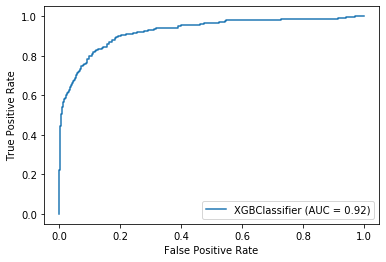

In [15]:
random_disp = plot_roc_curve(clf, train.loc[idxV, cols], y_train[idxV])
plt.show()

## <span style="color:green"> ANOTHER APPROACH : CLUSTERING AND RESAMPLING </span>